### Name: Thakrar Hinal
The Sparks Foundation


TASK #1 Prediction using Supervised ML

In [2]:
#importing all libraries that needed.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading csv file

In [50]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


### Understanding the data

In [51]:
s_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [52]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [53]:
s_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [54]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [55]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [56]:
s_data.shape

(25, 2)

In [57]:
sum=s_data.isnull().sum().sum()
print("total number of null values = ",sum)

total number of null values =  0


### Data Visualization

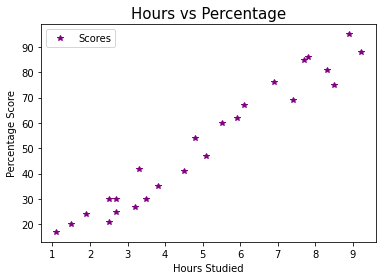

In [58]:
s_data.plot(x='Hours', y='Scores', style='*',color='purple')  
plt.title('Hours vs Percentage',fontsize=15)  
plt.xlabel('Hours Studied',)  
plt.ylabel('Percentage Score')  
plt.show()

<AxesSubplot:>

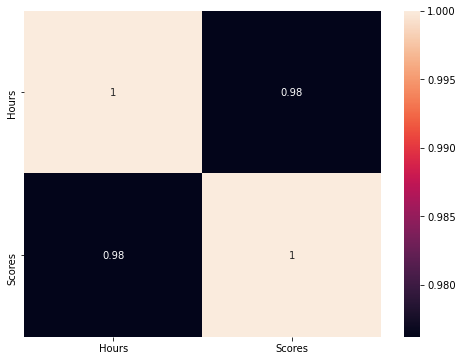

In [59]:
corre=s_data.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(data=corre,annot=True)

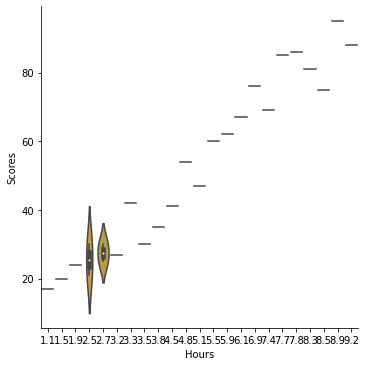

In [60]:
sns.catplot(x='Hours',y='Scores',data=s_data,kind='violin')

<AxesSubplot:ylabel='Density'>

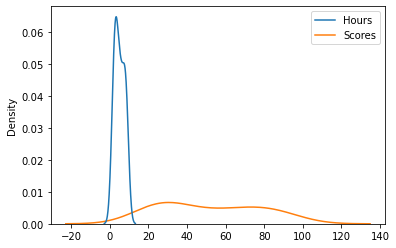

In [61]:
sns.kdeplot(data=s_data)

### Preparing the data

In [62]:
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [63]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Split the data into training and testing data sets

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.80,test_size=0.20,random_state=0)

In [65]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


### Training the algorithm

In [66]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(X_train, y_train)
y_predict= linearRegressor.predict(X_train)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training the model....")
print("Training completed....!!")

Training the model....
Training completed....!!


In [67]:
print("B0 =",regressor.intercept_,"\nB1 =",regressor.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


In [68]:
Y0 = regressor.intercept_ + regressor.coef_*X_train

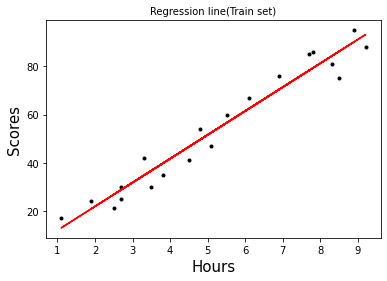

In [69]:
plt.scatter(X_train,y_train,color='black',marker='.')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

In [70]:
print("Accuracy of Training learning rate -",regressor.score(X_train, y_train)*100)
print("Accuracy of Testing learning rate - ",regressor.score(X_test, y_test)*100)

Accuracy of Training learning rate - 95.15510725211553
Accuracy of Testing learning rate -  94.54906892105356


### Building a linear model

In [71]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           2.79e-13
Time:                        18:48:51   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making prediction

In [72]:
##predicting the Scores for test data
y_pred=regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [73]:
#now print the Y_test.
y_test


array([20, 27, 69, 30, 62], dtype=int64)

In [74]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


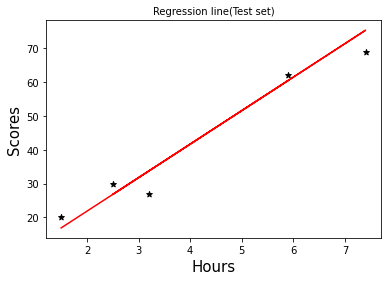

In [75]:
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

In [76]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9454906892105356

### Model Evaluation

In [77]:
mse = metrics.mean_squared_error(y_test,y_pred)
rootsqe = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
abse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("Mean_Squared_Error      = ",mse)
print("Root_Mean_Squared_Error = ",rootsqe)
print("Mean_Absolute_Error     = ",abse)

Mean_Squared_Error      =  21.5987693072174
Root_Mean_Squared_Error =  4.6474476121003665
Mean_Absolute_Error     =  4.6474476121003665


### Predicting the score

In [78]:
Prediction_score = regressor.predict([[9.25]])
print("predicted score for a student studying 9.25 hours per day is :",Prediction_score)

predicted score for a student studying 9.25 hours per day is : [93.69173249]


In [79]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
